In [119]:
import pandas as pd
import seaborn as sns

In [120]:
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df.columns=['class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [121]:
df['class']=df['class'].replace({2:0,3:0})

In [122]:
df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,0,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,0,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,0,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [123]:
col_list=df.columns.to_list()
col_list
X=df[col_list[1:]]
y_1=df[col_list[0]]

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size=0.33, random_state=64)

In [125]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

119
59
119
59


In [126]:
X_train

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
35,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920
129,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680
65,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678
116,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
51,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265
54,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060
166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695


##Scaling 적용 

In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
print(X_train_scaled)

[[0.60526316 0.21792261 0.56451613 ... 0.57731959 0.80586081 0.45791726]
 [0.18421053 0.72505092 0.5483871  ... 0.31958763 0.47619048 0.21540656]
 [0.06725146 0.2688391  0.59139785 ... 0.53608247 0.54212454 0.28673324]
 ...
 [0.68128655 0.18940937 0.47849462 ... 0.45360825 0.70695971 0.55777461]
 [0.59649123 0.60285132 0.66666667 ... 0.3814433  0.10622711 0.29743224]
 [0.17251462 0.54786151 0.34408602 ... 0.46391753 0.65201465 0.20399429]]


In [128]:
X_train

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
35,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920
129,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680
65,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678
116,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
51,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265
54,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060
166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695


In [129]:
X_test_scaled=scaler.transform(X_test)
print(X_test_scaled)
print(X_test_scaled.max(axis=0))
print(X_test_scaled.min(axis=0))

[[ 0.51461988  0.90631365  0.51612903  0.58762887  0.17857143  0.26480836
   0.08077994  0.90566038  0.35962145  0.69537815  0.12371134  0.07692308
   0.31883024]
 [ 0.26900585  0.0509165   0.3172043   0.21649485  0.69047619  0.32055749
   0.42061281  0.41509434  0.74132492  0.22268908  0.59793814  0.38095238
   0.33666191]
 [ 0.62865497  0.20162933  0.59139785  0.51030928  0.45238095  0.68989547
   0.67966574  0.13207547  0.64353312  0.52205882  0.51546392  0.64468864
   0.60057061]
 [ 0.61111111  0.48472505  0.67741935  0.69072165  0.53571429  0.14634146
   0.34261838  0.16981132  0.26498423  0.76890756  0.11340206  0.01098901
   0.15834522]
 [ 0.58479532  0.63136456  0.40860215  0.42268041  0.14285714  0.51219512
   0.65181058  0.26415094  0.33753943  0.31512605  0.44329897  0.63369963
   0.53994294]
 [ 0.27192982  0.34826884  0.59139785  0.53608247  0.23809524  0.55052265
   0.49303621  0.39622642  0.28391167  0.15966387  0.32989691  0.77289377
   0.11412268]
 [ 0.60526316  0.18940

#EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


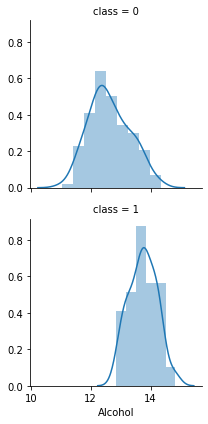

In [130]:
#Class 별로 
g=sns.FacetGrid(df,row='class')
g.map(sns.distplot,'Alcohol')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


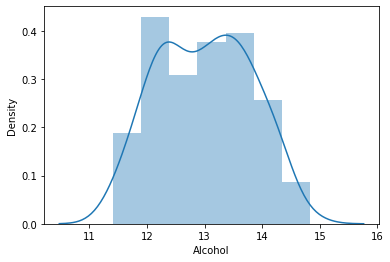

In [131]:
sns.distplot(X_train['Alcohol'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


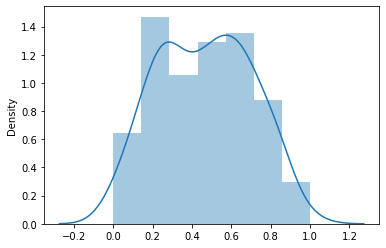

In [132]:
#Alcohol Scaling 이후
sns.distplot(X_train_scaled[:,0])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


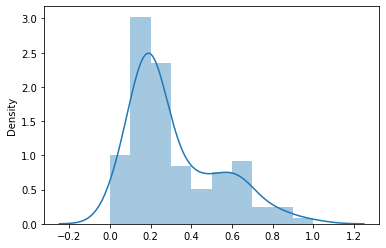

In [133]:
#Malic acid scaling 이후
sns.distplot(X_train_scaled[:,1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


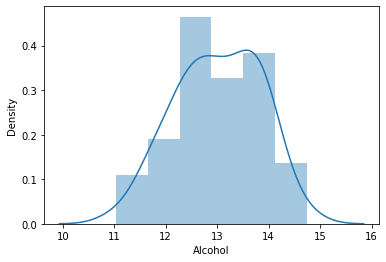

In [134]:
sns.distplot(X_test['Alcohol'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


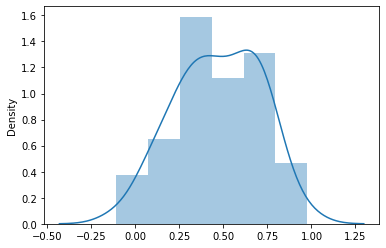

In [135]:
sns.distplot(X_test_scaled[:,0])

##KNN Classifier (Scaling 적용 전) + GridsearchCV

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
param_grid={'n_neighbors':list(range(2,10)),
             'weights':['uniform','distance'],
             'metric':['euclidean','manhattan']}
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=0, scoring='f1')
gs=grid_search.fit(X_train,y_train)

In [137]:
print(gs.best_params_)
print(gs.best_score_)

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
0.9047058823529414


In [138]:
pred=gs.predict(X_test)

In [139]:
gs.score(X_test,y_test)

0.8421052631578947

In [140]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,pred)

array([[37,  5],
       [ 1, 16]])

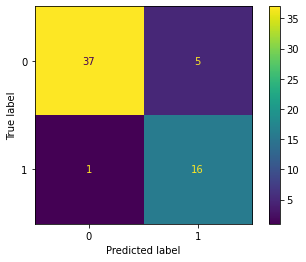

In [141]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gs,X_test,y_test)

In [142]:
##KNN- Scaling 후

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
param_grid={'n_neighbors':list(range(2,10)),
             'weights':['uniform','distance'],
             'metric':['euclidean','manhattan']}
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=0, scoring='f1')
gs=grid_search.fit(X_train_scaled,y_train)

In [144]:
print(gs.best_params_)
print(gs.best_score_)

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
0.9894736842105264


In [145]:
pred=gs.predict(X_test_scaled)

In [146]:
gs.score(X_test,y_test)

0.4788732394366197

In [147]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,pred)

array([[41,  1],
       [ 0, 17]])

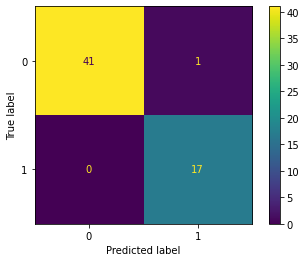

In [148]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gs,X_test_scaled,y_test)